In [53]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import sympy as sy
sy.init_printing() 

In [54]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

# <font face="gotham" color="purple"> 特征值和特征向量

首先给出特征值与特征向量的定义：对矩阵 $A$，若有 $Ax = \lambda x$，则 $x$ 为矩阵 $A$ 的特征向量，$\lambda$ 为矩阵的特征值。

上式也可表示为,

$$
(A-\lambda I)x = 0
$$

由于特征向量不可能为零向量：

1. $(A-\lambda I)$ 的列或行线性无关。
2. $(A-\lambda I)$ 不是满秩， $Rank(A)<n$.
3. $(A-\lambda I)$ 不可逆。
4. $\text{det}(A-\lambda I)=0$, 此方程也称为特征方程。

考虑一个矩阵 $A$

$$
A=\left[\matrix{1 & 0 & 0\cr 1 & 0 & 1\cr 2 & -2 & 3}\right]
$$

建立特征方程，

$$
\text{det}\left(
\left[\matrix{1 & 0 & 0\cr 1 & 0 & 1\cr 2 & -2 & 3}\right]-
\lambda
\left[\matrix{1 & 0 & 0\cr 0 & 1 & 0\cr 0 & 0 & 1}\right]
\right)=0
$$

使用 SymPy 中的 ```charpoly``` 和 ```factor```， 我们可以直接解出特征值。

In [55]:
lamda = sy.symbols('lamda') # 'lamda' withtout 'b' is reserved for SymPy, lambda is reserved for Python

```charpoly``` 返回特征方程。

In [56]:
A = sy.Matrix([[1, 0, 0], [1, 0, 1], [2, -2, 3]])
p = A.charpoly(lamda); p

对多项式进行分解，便于得到方程的解。

In [57]:
sy.factor(p)

由上式可得到特征值为 $\lambda =1$ ，$\lambda =2$。 如果不需要分解因式结果，我们可以使用 ```solve``` 。

In [58]:
sy.solve(p,lamda)

或者直接使用 ```eigenvals``` 。

In [59]:
sy.matrices.MatrixEigen.eigenvals(A)

为了找到对应于 $\lambda$ 的特征向量，我们将特征值代入 $(A-\lambda I)x=0$ 并求解。 用 $\lambda =1$ 构造增广矩阵并执行 rref 。

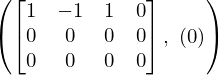

In [60]:
(A - 1*sy.eye(3)).row_join(sy.zeros(3,1)).rref()

零空间是线性系统的解集。

$$
\left[
\begin{matrix}
x_1 \\ x_2 \\ x_3
\end{matrix}
\right]=
\left[
\begin{matrix}
x_2-x_3 \\ x_2 \\ x_3
\end{matrix}
\right]=
x_2\left[
\begin{matrix}
1 \\ 1 \\ 0
\end{matrix}
\right]
+x_3\left[
\begin{matrix}
-1 \\ 0 \\ 1
\end{matrix}
\right]
$$

这被称为 $\lambda = 1$ 的特征空间，也是 $\mathbb{R}^3$ 的子空间。所有的特征向量都在特征空间里。

我们也可以继续使用 $\lambda = 2$ 。

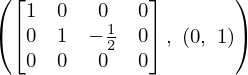

In [61]:
(A - 2*sy.eye(3)).row_join(sy.zeros(3,1)).rref()

零空间是线性系统的解集。

$$
\left[
\begin{matrix}
x_1 \\ x_2 \\ x_3
\end{matrix}
\right]=
\left[
\begin{matrix}
0\\ \frac{1}{2}x_3\\ x_3
\end{matrix}
\right]=
x_3\left[
\begin{matrix}
0 \\ \frac{1}{2} \\ 1
\end{matrix}
\right]
$$

为了避免来回求解的麻烦，SymPy 有 ```eigenvects``` 来计算特征值和特征空间。

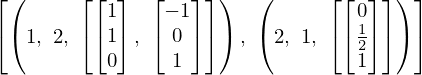

In [62]:
eig = sy.matrices.MatrixEigen.eigenvects(A)
eig

为了使我们刚刚得到的结果更加清晰，

In [63]:
print('Eigenvalue = {0}, Multiplicity = {1}, Eigenspace = {2}'.format(eig[0][0], eig[0][1], eig[0][2]))

Eigenvalue = 1, Multiplicity = 2, Eigenspace = [Matrix([
[1],
[1],
[0]]), Matrix([
[-1],
[ 0],
[ 1]])]


In [64]:
print('Eigenvalue = {0}, Multiplicity = {1}, Eigenspace = {2}'.format(eig[1][0], eig[1][1], eig[1][2]))

Eigenvalue = 2, Multiplicity = 1, Eigenspace = [Matrix([
[  0],
[1/2],
[  1]])]


## <font face="gotham" color="purple"> 特征值和特征空间的 NumPy 函数

将 SymPy 矩阵转换为 NumPy 浮点数组。

In [65]:
A = np.array(A).astype(float); A

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  1.],
       [ 2., -2.,  3.]])

```.eigvals()``` 和 ```.eig(A)``` 是方便求解特征值和特征向量的函数。

In [66]:
np.linalg.eigvals(A) 

array([2., 1., 1.])

In [67]:
np.linalg.eig(A) #return both eigenvalues and eigenvectors

(array([2., 1., 1.]), array([[ 0.   ,  0.   ,  0.408],
        [ 0.447,  0.707, -0.408],
        [ 0.894,  0.707, -0.816]]))

## <font face="gotham" color="purple"> 举例

考虑一个矩阵 $A$

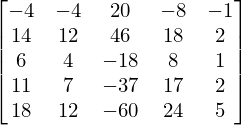

In [68]:
A = sy.Matrix([[-4, -4, 20, -8, -1], 
               [14, 12, 46, 18, 2], 
               [6, 4, -18, 8, 1], 
               [11, 7, -37, 17, 2], 
               [18, 12, -60, 24, 5]])
A

求解特征值。

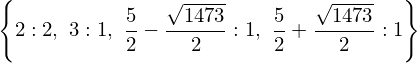

In [69]:
eig = sy.matrices.MatrixEigen.eigenvals(A)
eig

或者使用 NumPy 函数显示特征值。

In [70]:
A = np.array(A)
A = A.astype(float)
eigval, eigvec = np.linalg.eig(A)
eigval

array([ 21.69, -16.69,   3.  ,   2.  ,   2.  ])

以及相应的特征向量。

In [71]:
eigvec

array([[-0.124, -0.224, -0.   ,  0.816, -0.056],
       [ 0.886, -0.543, -0.894, -0.408,  0.263],
       [ 0.124,  0.224,  0.   , -0.   , -0.   ],
       [ 0.216,  0.392,  0.447, -0.408, -0.207],
       [ 0.371,  0.672, -0.   ,  0.   ,  0.941]])